In [1]:

import matplotlib.pyplot as plt
import numpy as np

from skfda import datasets
from skfda.exploratory.visualization.clustering import (
    ClusterMembershipLinesPlot,
    ClusterMembershipPlot,
    ClusterPlot,
)
from skfda.ml.clustering import FuzzyCMeans, KMeans

# Example 1

In [ ]:
import skfda
data_matrix = [[1, 1, 2, 3, 2.5, 2],
               [0.5, 0.5, 1, 2, 1.5, 1],
               [-1, -1, -0.5, 1, 1, 0.5],
               [-0.5, -0.5, -0.5, -1, -1, -1]]
grid_points = [0, 2, 4, 6, 8, 10]

fd = skfda.FDataGrid(data_matrix, grid_points)
kmeans = skfda.ml.clustering.KMeans(n_clusters=3, random_state=0)
kmeans.fit(fd)
group_center = kmeans.cluster_centers_.data_matrix # (n_clusters, # of length, ?)
group_fd = kmeans.predict(fd) # # of fda

# Example 2

In [21]:
X, y = datasets.fetch_weather(return_X_y=True, as_frame=True)
fd = X.iloc[:, 0].values
fd_temperatures = fd.coordinates[0]
target = y.values


In [37]:
# The desired FDataGrid only contains 10 random samples, so that the example
# provides clearer plots.
indices_samples = np.array([1, 3, 5, 10, 14, 17, 21, 25, 27, 30])
fd = fd_temperatures[indices_samples]
climates = target[indices_samples].remove_unused_categories()

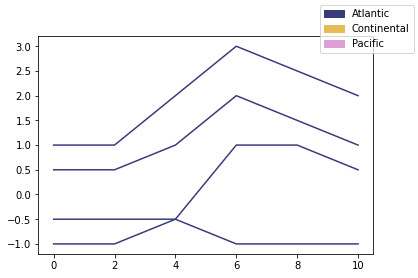

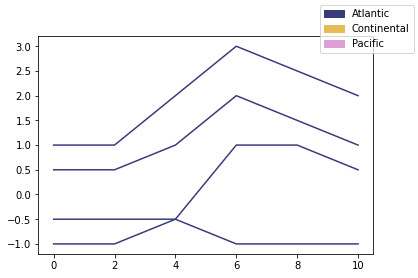

In [49]:
# Assigning the color to each of the groups.
colormap = plt.cm.get_cmap('tab20b')
n_climates = len(climates.categories)
climate_colors = colormap(np.arange(n_climates) / (n_climates - 1))

fd.plot(group=climates.codes, group_names=climates.categories, group_colors=climate_colors)

In [12]:
n_clusters = n_climates
seed = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=seed)
kmeans.fit(fd)
print(kmeans.predict(fd))

[0 1 0 0 0 2 2 1 0 2]


# NYISO

In [52]:
data = np.load('/home/hchuang/Documents/Project/SSSD_CP/src/datasets/NYISO/dataset_1/zone/load_array_N.Y.C._test_stdd.npy')

In [53]:
data.shape

(358, 192, 1)

In [88]:
grid_points = range(data.shape[1])

In [128]:
fd = skfda.FDataGrid(data, grid_points)
kmeans = skfda.ml.clustering.KMeans(n_clusters=10, random_state=0)
kmeans.fit(fd)
group_center = kmeans.cluster_centers_.data_matrix # (n_clusters, # of length, ?)
group_fd = kmeans.predict(fd) # # of fda

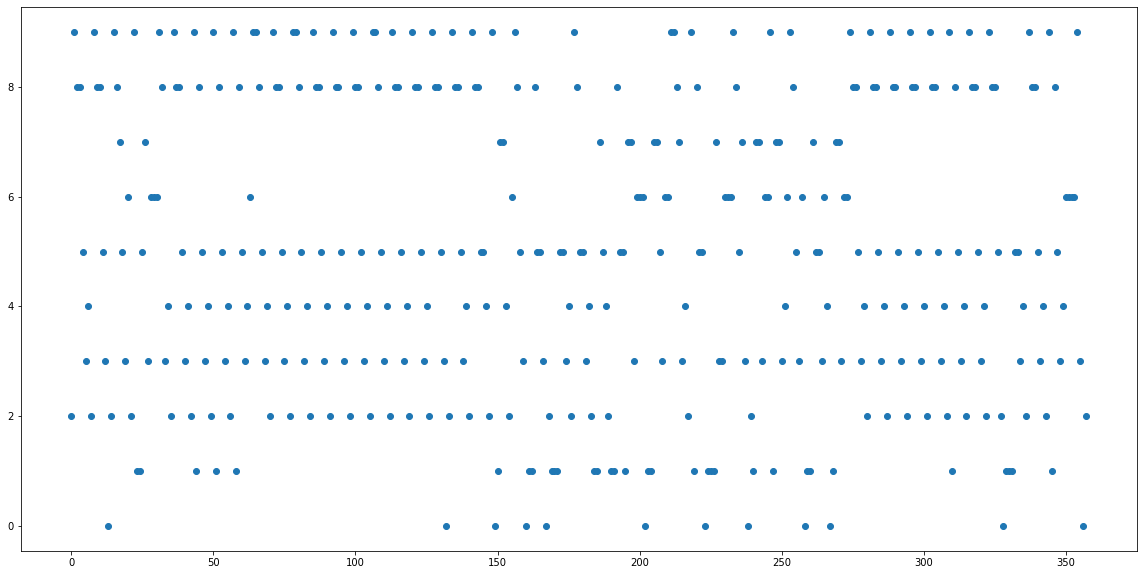

In [129]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10)) 
plt.scatter(list(range(data.shape[0])), group_fd.tolist())

In [54]:
# import skfda
# data_matrix = [[1, 1, 2, 3, 2.5, 2],
#                [0.5, 0.5, 1, 2, 1.5, 1],
#                [-1, -1, -0.5, 1, 1, 0.5],
#                [-0.5, -0.5, -0.5, -1, -1, -1]]
# grid_points = [0, 2, 4, 6, 8, 10]

fd = skfda.FDataGrid(data_matrix, grid_points)
kmeans = skfda.ml.clustering.KMeans(n_clusters=3, random_state=0)
kmeans.fit(fd)
group_center = kmeans.cluster_centers_.data_matrix # (n_clusters, # of length, ?)
group_fd = kmeans.predict(fd) # # of fda